## Image pyramids

In this notebook we are going to explore the OpenCV utilities for [Image Pyramids](https://docs.opencv.org/3.4/d4/d1f/tutorial_pyramids.html). In OpenCV there are following two kinds of the Image Pyramids.

* Gaussian Pyramid - used to create down sampled version of an image.
* Laplacian Pyramid - used to reconstruct an up sampled version of an image from a lower resoluton version.

Following function are useful for us to create down sampled and up sampled versions of the image.

* [pyrDown](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gaf9bba239dfca11654cb7f50f889fc2ff) - convolves a Gaussian kernel to the image than down samples it by discarding the even numbered rows from it. In this exercise we'd use the default settings.
* [pyrUp](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gada75b59bdaaca411ed6fee10085eb784) - introduces even number rows and columns of zeros to the provided low resolution image and then convolves with the same Gaussian kernel used for down sampling.

In our exercise we'd focus on just down sampling for now.

In [1]:
# Import required modules
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

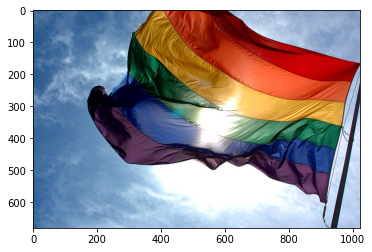

In [2]:
# Read in the image
image: np.ndarray = cv2.imread(filename='images/rainbow_flag.jpg')
image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2RGB)
plt.imshow(image)

## Down Sampling

In [3]:
# Use pyrDown function to down sample the image a few times
level_0: np.ndarray = cv2.pyrDown(src=image)
level_1: np.ndarray = cv2.pyrDown(src=level_0)
level_2: np.ndarray = cv2.pyrDown(src=level_1)


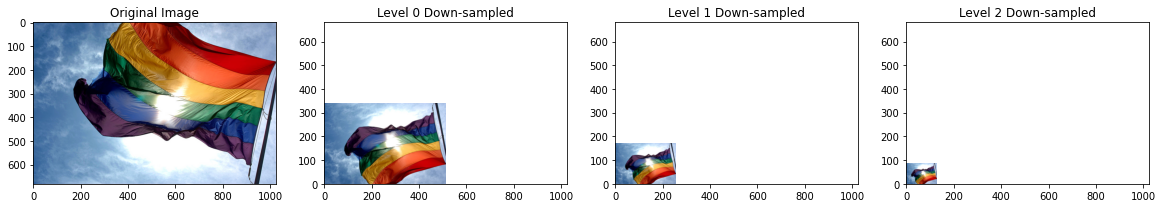

In [4]:
# Visualize the down sampled images
_, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(20,10))

ax1.imshow(image)
ax1.set_title('Original Image')

ax2.imshow(level_0)
ax2.set_xlim([0, image.shape[1]])
ax2.set_ylim([0, image.shape[0]])
ax2.set_title('Level 0 Down-sampled')

ax3.imshow(level_1)
ax3.set_xlim([0, image.shape[1]])
ax3.set_ylim([0, image.shape[0]])
ax3.set_title('Level 1 Down-sampled')

ax4.imshow(level_2)
ax4.set_xlim([0, image.shape[1]])
ax4.set_ylim([0, image.shape[0]])
ax4.set_title('Level 2 Down-sampled');

## Up Sampling

In [6]:
# Use pyrUp to upsample the low resolution image a few times
up_samp_level2: np.ndarray = cv2.pyrUp(src=level_2)
up_samp_level1: np.ndarray = cv2.pyrUp(src=up_samp_level2)
up_samp_level0: np.ndarray = cv2.pyrUp(src=up_samp_level1)

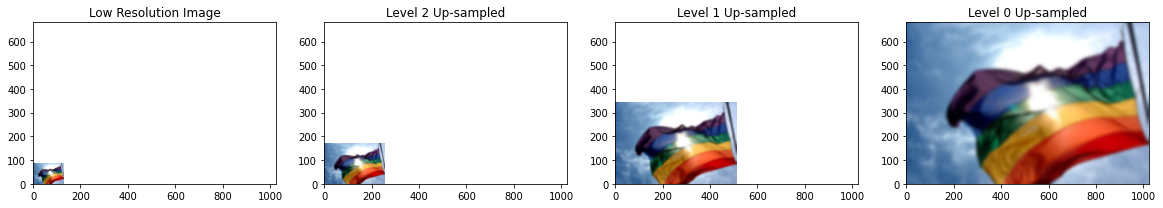

In [7]:
# Visualize the up sampled images
_, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(20,10))

ax1.imshow(level_2)
ax1.set_title('Low Resolution Image')
ax1.set_xlim([0, image.shape[1]])
ax1.set_ylim([0, image.shape[0]])

ax2.imshow(up_samp_level2)
ax2.set_xlim([0, image.shape[1]])
ax2.set_ylim([0, image.shape[0]])
ax2.set_title('Level 2 Up-sampled')

ax3.imshow(up_samp_level1)
ax3.set_xlim([0, image.shape[1]])
ax3.set_ylim([0, image.shape[0]])
ax3.set_title('Level 1 Up-sampled')

ax4.imshow(up_samp_level0)
ax4.set_xlim([0, image.shape[1]])
ax4.set_ylim([0, image.shape[0]])
ax4.set_title('Level 0 Up-sampled');

In this exercise we have practiced creating low resolution versions of a source image (down sampling) and then also practice the reconstruction of the higher resolution of image starting from the low resolution image (up sampling). In the process we notice, that while up sampling we have lost sharpness of the image. That is natural because we starting from a low resolution image, introducing 0 values and then averaging the values across the image using Gaussian kernel. Hence in the the reconstructed picture we have lost some detail.